In [1]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset in jupyter notebook
#Around100M+ ratings 4499 movies 480,000+ users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading dataset file
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt (3).zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset



Cust_Id  Rating
0              1:     NaN
1         1488844     3.0
2          822109     5.0
3          885013     4.0
4           30878     4.0
...           ...     ...
24058258  2591364     2.0
24058259  1791000     2.0
24058260   512536     5.0
24058261   988963     3.0
24058262  1704416     3.0

[24058263 rows x 2 columns]

In [4]:
netflix_dataset.iloc[545:570,0:]

Cust_Id  Rating
545  1535440     4.0
546  1426604     4.0
547  1815755     5.0
548       2:     NaN
549  2059652     4.0
550  1666394     3.0
551  1759415     4.0
552  1959936     5.0
553   998862     4.0
554  2625420     2.0
555   573975     3.0
556   392722     4.0
557  1401650     4.0
558   988104     3.0
559   977632     4.0
560  2557870     4.0
561  1793899     5.0
562  1340535     5.0
563  1888322     5.0
564  1283598     3.0
565  1784150     4.0
566  2271251     5.0
567    65932     3.0
568  1828884     5.0
569  1878728     4.0

In [5]:
netflix_dataset.tail()

Cust_Id  Rating
24058258  2591364     2.0
24058259  1791000     2.0
24058260   512536     5.0
24058261   988963     3.0
24058262  1704416     3.0

In [6]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [7]:
netflix_dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [8]:

# netflix_dataset['Rating']=netflix_dataset['Rating'].astype(float)

In [9]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [10]:

netflix_dataset.shape

(24058263, 2)

In [11]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()

In [12]:
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [13]:
movie_count1=movie_count["Rating"]

In [14]:
movie_count1

4499

In [15]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [16]:
customer_count

475257

In [17]:
#without NaN values
customer_count=customer_count-movie_count
customer_count

Cust_Id    475257
Rating     470758
dtype: int64

In [18]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [19]:
# netflix_dataset['Rating'].count()


In [20]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [21]:
stars

count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583

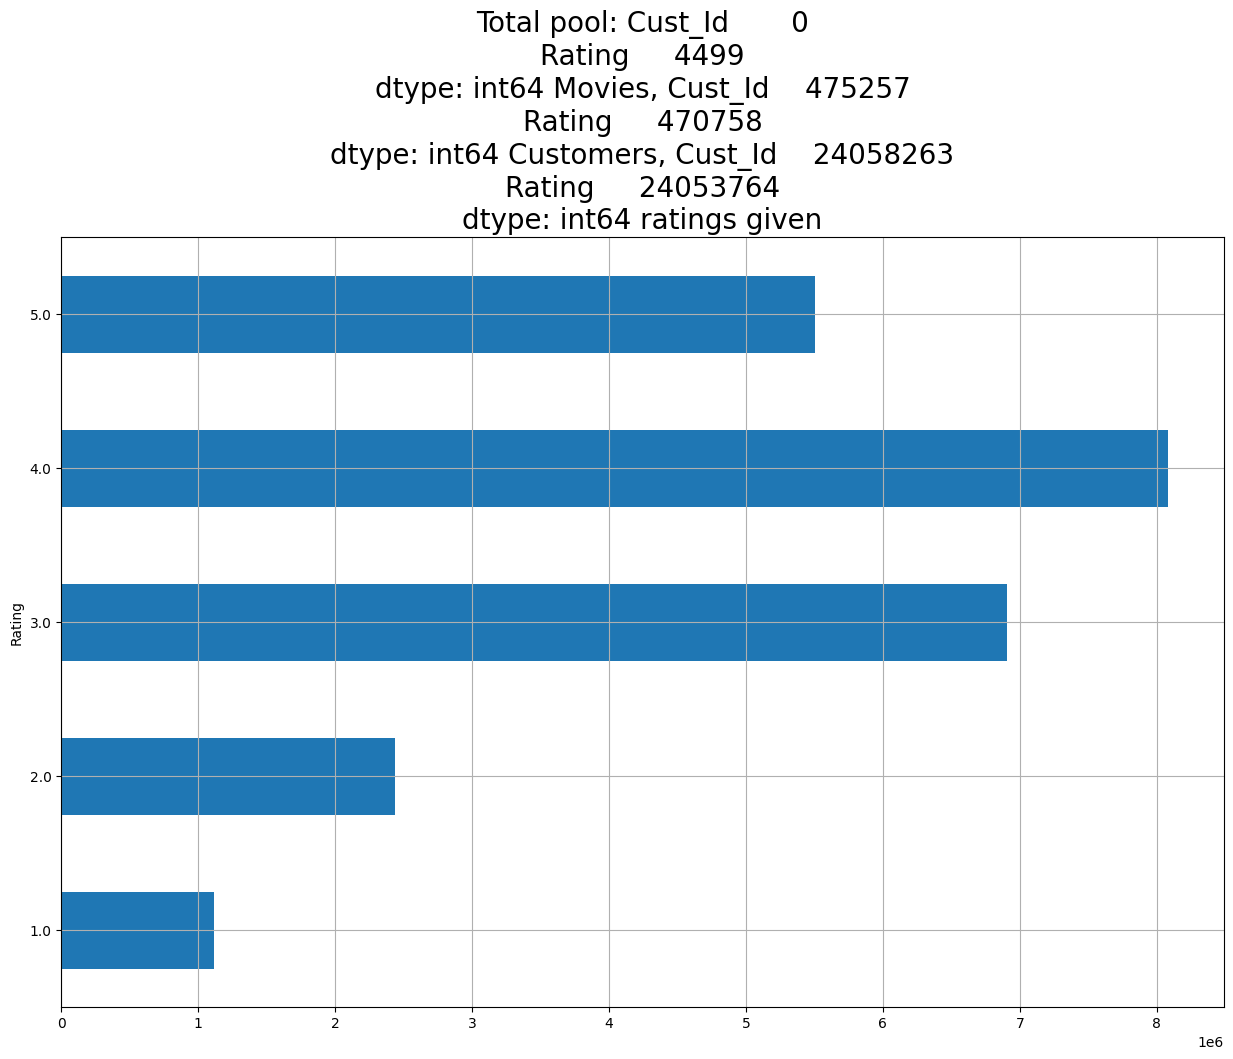

In [22]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [23]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [24]:
# pd.isnull(netflix_dataset.Rating)

In [25]:
df_nan

Rating
0           True
1          False
2          False
3          False
4          False
...          ...
24058258   False
24058259   False
24058260   False
24058261   False
24058262   False

[24058263 rows x 1 columns]

In [26]:
df_nan.iloc[547:570,:]

Rating
547   False
548    True
549   False
550   False
551   False
552   False
553   False
554   False
555   False
556   False
557   False
558   False
559   False
560   False
561   False
562   False
563   False
564   False
565   False
566   False
567   False
568   False
569   False

In [27]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

Rating
0           True
548         True
694         True
2707        True
2850        True
...          ...
24046714    True
24047329    True
24056849    True
24057564    True
24057834    True

[4499 rows x 1 columns]

In [28]:
df_nan.shape

(4499, 1)

In [29]:
df_nan.head()

Rating
0       True
548     True
694     True
2707    True
2850    True

In [30]:
df_nan.tail()

Rating
24046714    True
24047329    True
24056849    True
24057564    True
24057834    True

In [31]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [32]:
df_nan

index  Rating
0            0    True
1          548    True
2          694    True
3         2707    True
4         2850    True
...        ...     ...
4494  24046714    True
4495  24047329    True
4496  24056849    True
4497  24057564    True
4498  24057834    True

[4499 rows x 2 columns]

In [33]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [34]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [35]:
len(netflix_dataset)

24058263

In [36]:
df_nan.iloc[-1,0]-1

24057833

In [37]:
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1


last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)

In [38]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.498e+03, 4.498e+03,
       4.498e+03])

In [39]:
[1,1,1,1,1,1,1,1,1,1,1..,2,2,2,2,2,2,2,,.............................4499,4499,4499]

SyntaxError: invalid syntax (<ipython-input-39-3fc8ac88a91b>, line 1)

In [40]:
24058263-24057834-1

428

In [41]:
# df_nan.iloc[-1,0]

In [42]:
# len(movie_np)

In [43]:
# len(netflix_dataset)

In [44]:
# df_nan.iloc[-1,0]

In [45]:
24058263-24057834-1

428

In [46]:
# 24053764-24057834-1

In [47]:
# netflix_dataset

In [48]:
# df_nan['index'][1:]


In [49]:
# df_nan['index'][:-1]

In [50]:
# df_nan.iloc[-1,0]-1

In [51]:
# len(netflix_dataset)

In [52]:
# # working
# x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [53]:
# y=tuple(x)
# y

In [54]:
len(y)

NameError: name 'y' is not defined

In [55]:
# temp=np.full((1,547), 1) #(shape, fill_value)

In [56]:
# print(temp)

In [57]:
movie_np.astype(int)

array([   1,    1,    1, ..., 4498, 4498, 4498])

In [58]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset

ValueError: Length of values (24053336) does not match length of index (24053764)

In [ ]:
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset

In [ ]:
netflix_dataset.tail()

In [ ]:
#pre-filtering

In [ ]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers


In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [ ]:
dataset_movie_summary

In [ ]:
# Benchmark

In [ ]:
dataset_movie_summary["count"].quantile(0.6)

In [ ]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

In [ ]:
dataset_movie_summary['count']

In [ ]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

In [ ]:
len(drop_movie_list)


In [ ]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

In [ ]:
len(drop_cust_list)

In [ ]:
#we will remove all the customers and movies that are below the benchmark
# print('The original dataframe has: ', netflix_dataset.shape, 'shape')

In [ ]:
# netflix_dataset['Movie_Id'].isin(drop_movie_list)

In [ ]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

In [ ]:
netflix_dataset.head()

In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/Netflix dataset/Copy of movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

# df_title.set_index('Movie_Id', inplace=True)

In [ ]:
df_title.head(10)

In [ ]:
!pip install scikit-surprise

In [ ]:
#model building

# import math
# import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
#!pip install scikit-surprise

In [ ]:
#help us to read the dataset for svd algo
reader=Reader()

In [ ]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [ ]:
data

In [ ]:
model=SVD()
# cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)
#for 1st fold- 1,2,3,4,5

In [ ]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

In [ ]:
netflix_dataset.head()

In [ ]:
# netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)

In [ ]:
# so first we take user 1331154 and we try to recommend some movies based on the past data


In [ ]:
df_title

In [ ]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_1331154=df_title.copy()
user_1331154

In [ ]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

In [ ]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# user_712664=user_712664.drop('Movie_Id', axis=1)

In [ ]:
user_1331154

In [ ]:
user_1331154=user_1331154.sort_values('Estimate_Score',ascending=False)
user_1331154

In [ ]:
user_1331154.head(5)